## House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 80)
%matplotlib inline

In [2]:
train_data = pd.read_csv('train_data_no_missing_values.csv')
test_data = pd.read_csv('test_data_no_missing_values.csv')

In [3]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSales
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAme

## Exploratory Data Analysis

Getting numerical and categorical features

In [4]:
#selecting ordinal features
ordinal_feat = ['MSSubClass', 'OverallQual', 'OverallCond']

In [5]:
numerical_feat = [column for column in train_data.columns if train_data[column].dtypes != 'O' and column not in ordinal_feat]

In [6]:
categorical_feat = [column for column in train_data.columns if train_data[column].dtypes == 'O'] + ordinal_feat

In [7]:
numerical_data = train_data[numerical_feat]

In [8]:
numerical_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,PriceSales
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,0,112,0,0,0,0,4,2010,142125


Some info <br>
We have 4 yearly features.<br>
    Some categories have multiple features e.g Basement have Basement unfinished, Basement Finished, Basement Bathrooms etc<br>

### Questions for EDA
1) How LotFrontage effecting prices.<br>
2) Having large LotArea will increase prices.<br>
3) How prices vary of Houses on the basis of how old it is? <br>
4) Which year have Highest sales. <br>
5) How Garage Area effecting prices. <br>
6) What are the efects of ground living area. <br>
7) What is correlationship between features. <br>
8) How prices vary on HouseStyle.<br>
9) What is effect of Zoning on Prices.<br>
10) How the differents types of dwelling involved in the sale.<br>
11) Which location have highest sales within Ames city.<br>
12) What is the quality percentage of houses.<br>
13) Are the sales increasing over year or not. <br>
14) Yearly Sold houses condition.<br>
15) House prices wrt garage condition.

## 1) How LotFrontage effecting prices.

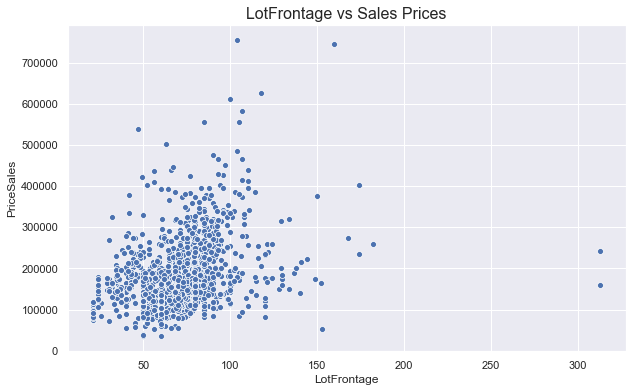

In [9]:
lotfront = numerical_data[['LotFrontage', 'PriceSales']]
plt.figure(figsize=[10,6])
sns.scatterplot(data = lotfront, x='LotFrontage', y='PriceSales')
plt.title('LotFrontage vs Sales Prices', fontsize=16)
plt.show()

Takeaways:<br>
we have different cases.<br>
<h4>1) High Prices:</h4><br>
    1) There are houses which have low frontage area but high prices. this is because that house may be lie in premium 
        category.<br>
    2) Second reason can be is that house location is in main city or in place which is very popular.<br>
    3) House can be new and high quality.<br>
<h4>2) Average Prices:</h4><br>
    1) These House have average prices with respect to LoFrontage Area.<br>
    2) This can be location of house is in between rural and urban area.<br>
    3) House is not too old. <br>
<h4>3) Low Prices:</h4><br>
    1) These house have high LotFrontage area and low prices.<br>
    2) This because of geographical location is in rural area.<br>
    3) Another reason can be House is too old or bad condition.<br>
<br>
we have some outliers too.

## 2) Having large LotArea will increase prices.

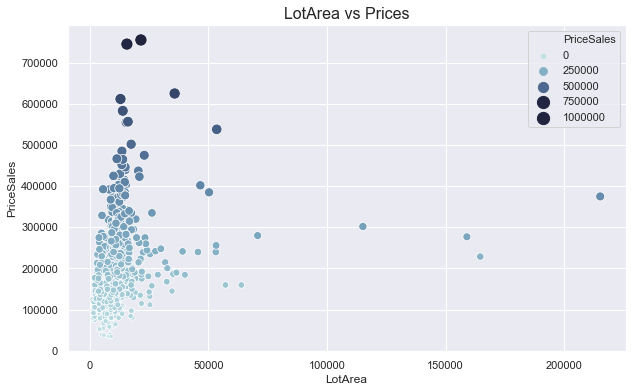

In [10]:
plt.figure(figsize=[10,6])
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(data = numerical_data, x='LotArea', y='PriceSales', size = 'PriceSales', sizes=(20, 150), 
                palette=cmap, hue='PriceSales')
plt.title('LotArea vs Prices', fontsize=16)
plt.show()

We are looking at the same above situation.<br>
In this situation couple of more reasons can. Same LotArea have different prices this can be because of: <br> 
1) Different house styles. <br>
2) Different geographical location. <br>
3) House type (i.e 1 story, 2 story).<br>

## 3) How prices vary of Houses on the basis of how old it is?

In [11]:
house_old = numerical_data[['YearBuilt', 'YrSold', 'PriceSales']]
house_old['YrsOld'] = house_old['YrSold'] - house_old['YearBuilt']
house_old

,YearBuilt,YrSold,PriceSales,YrsOld
0,2003,2008,208500,5
1,1976,2007,181500,31
2,2001,2008,223500,7
3,1915,2006,140000,91
4,2000,2008,250000,8
...,...,...,...,...
1455,1999,2007,175000,8
1456,1978,2010,210000,32
1457,1941,2010,266500,69
1458,1950,2010,142125,60


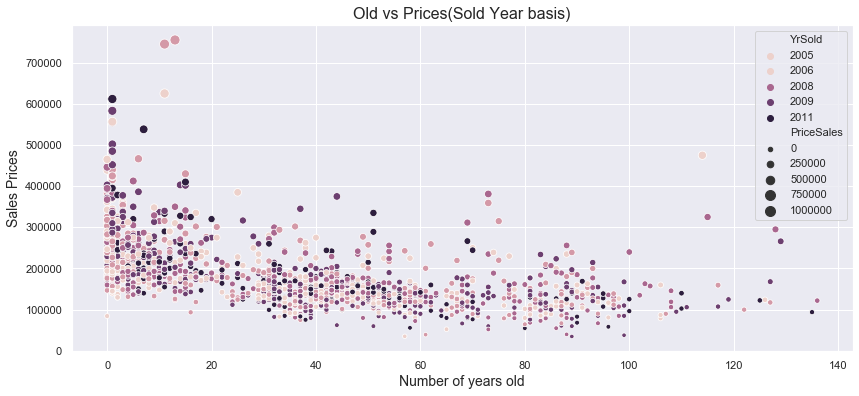

In [12]:
plt.figure(figsize=[14,6])
sns.scatterplot(data=house_old, x='YrsOld', y='PriceSales', hue='YrSold',
                size = 'PriceSales', sizes=(20, 100))
plt.legend(loc='top left')
plt.xlabel('Number of years old', fontsize=14)
plt.ylabel('Sales Prices', fontsize=14)
plt.title('Old vs Prices(Sold Year basis)', fontsize=16)
plt.show()

Newly made house have high prices it make sense. <br>
As year pass prices start decreasing.<br> 
We have some special cases too some of house are older than 100 years and they have high prices that house can historical building of famouse person or outliers.

Let's check prices veriaty of prices decrease.

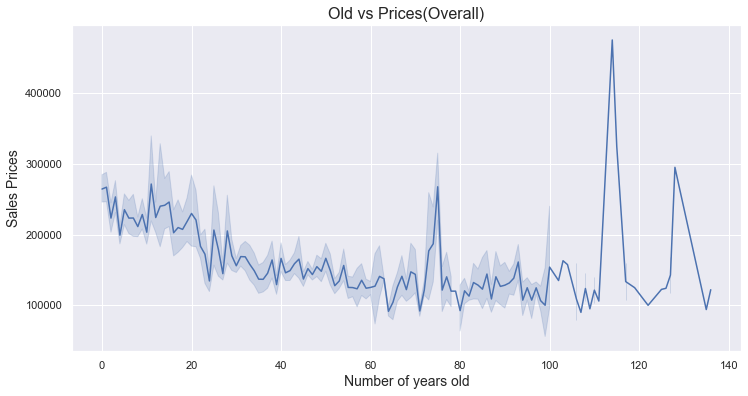

In [13]:
plt.figure(figsize=[12,6])
sns.lineplot(data=house_old, x='YrsOld', y='PriceSales')
plt.title('Old vs Prices(Overall)', fontsize=16)
plt.xlabel('Number of years old', fontsize=14)
plt.ylabel('Sales Prices', fontsize=14)
plt.show()

Yes prices go down as year pass but we face some special cases. 75 and some 100 years older buildings have high prices.

## 4) Which year have Highest sales.

In [14]:
sales_by_year = pd.DataFrame(numerical_data.groupby('YrSold')['PriceSales'].count())
sales_by_year.columns = ['Number of Sales']
sales_by_year['Years'] = sales_by_year.index
sales_by_year['Percentage'] = round((sales_by_year['Number of Sales']/sum(sales_by_year['Number of Sales']))*100,2)

In [15]:
sales_by_year

,Number of Sales,Years,Percentage
YrSold,,,
2006,314,2006,21.51
2007,329,2007,22.53
2008,304,2008,20.82
2009,338,2009,23.15
2010,175,2010,11.99


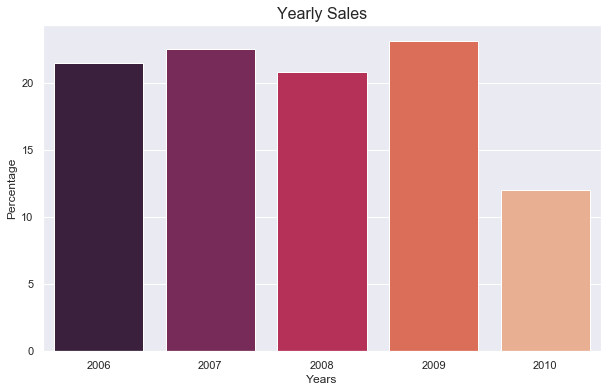

In [16]:
plt.figure(figsize=[10,6])
sns.barplot(data=sales_by_year, x='Years', y='Percentage', palette="rocket")
plt.title('Yearly Sales', fontsize=16)
plt.show()

2009 have highest sales followed by 2017, 2006, 2008 and 2010. <br>
2010 have lowest sales.

## 5) How Garage Area effecting prices. 

In [17]:
garage = numerical_data[['GarageArea', 'PriceSales']]

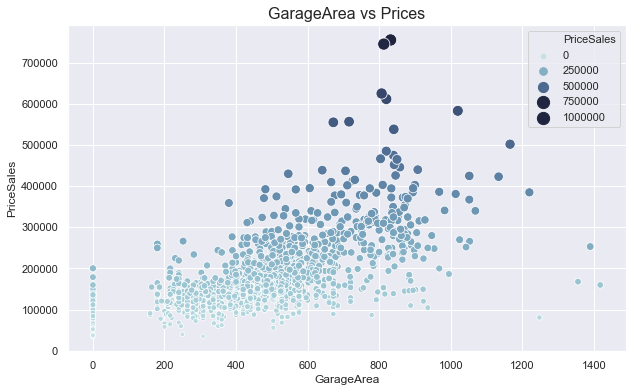

In [18]:
plt.figure(figsize=[10,6])
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(data=garage, x='GarageArea', y='PriceSales', size = 'PriceSales', sizes=(20, 150), 
                palette=cmap, hue='PriceSales')
plt.title('GarageArea vs Prices', fontsize=16)
plt.show()

Garage Area is strongly correlated to prices. Having large area of garage increase the sales prices.<br>
One more case we can notice houses having zero area that's because those houses don't have garage. 

## 6) What are the efects of ground living area.

In [19]:
ground_liv = numerical_data[['GrLivArea', 'PriceSales']]

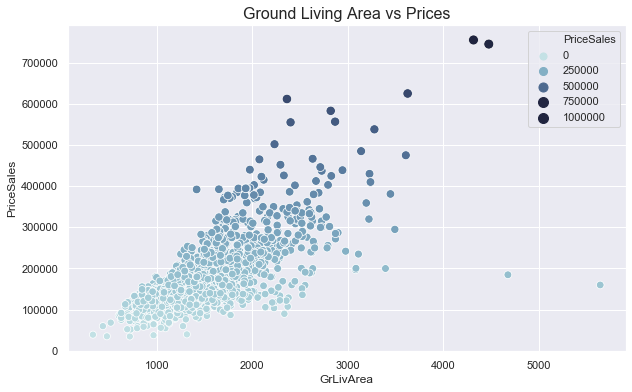

In [20]:
plt.figure(figsize=[10,6])
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(data=ground_liv, x='GrLivArea', y='PriceSales', size = 'PriceSales', sizes=(50, 100), 
                palette=cmap, hue='PriceSales')
plt.title('Ground Living Area vs Prices', fontsize=16)
plt.show()

graph showing strong positive correlation between both of them. It also make sense as living area increase prices also increase.

## 7) What is correlationship between features. 

In [21]:
corr = numerical_data.corr()

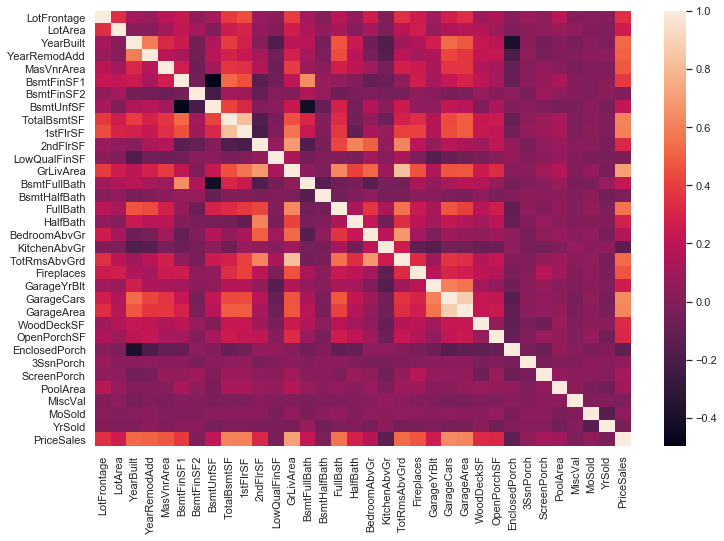

In [22]:
plt.figure(figsize=[12,8])
sns.heatmap(corr)
plt.show()

Yearbuilt, YearRemodAdd, Masvnr, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageCars, GarageArea These are the features which are highly correlated to house prices.


## 8) How prices vary on HouseStyle.

In [23]:
Story2 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '2Story']['PriceSales'].values, 
                      columns=['SalesPrice'])
Story2['HouseStyle'] = '2Story'
Story1 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '1Story']['PriceSales'].values, 
                      columns=['SalesPrice'])
Story1['HouseStyle'] = '1Story'
Fin1_5 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '1.5Fin']['PriceSales'].values, 
                      columns=['SalesPrice'])
Fin1_5['HouseStyle'] = '1.5Fin'
Unf1_5 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '1.5Unf']['PriceSales'].values, 
                      columns=['SalesPrice'])
Unf1_5['HouseStyle'] = '1.5Unf'
SFoyer = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == 'SFoyer']['PriceSales'].values, 
                      columns=['SalesPrice'])
SFoyer['HouseStyle'] = 'SFoyer'
SLvl = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == 'SLvl']['PriceSales'].values, 
                      columns=['SalesPrice'])
SLvl ['HouseStyle'] = 'SLvl'
Unf2_5 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '2.5Unf']['PriceSales'].values, 
                      columns=['SalesPrice'])
Unf2_5['HouseStyle'] = '2.5Unf'
Fin2_5 = pd.DataFrame(train_data.loc[train_data['HouseStyle'] == '2.5Fin']['PriceSales'].values, 
                      columns=['SalesPrice'])
Fin2_5['HouseStyle'] = '2.5Fin'

In [24]:
house_style = pd.concat([Story2, Story1, Fin1_5,
                         Unf1_5, SFoyer, SLvl, Unf2_5, Fin2_5], ignore_index=True)
house_style

,SalesPrice,HouseStyle
0,208500,2Story
1,223500,2Story
2,140000,2Story
3,250000,2Story
4,200000,2Story
...,...,...
1455,295000,2.5Fin
1456,200000,2.5Fin
1457,118500,2.5Fin
1458,197000,2.5Fin


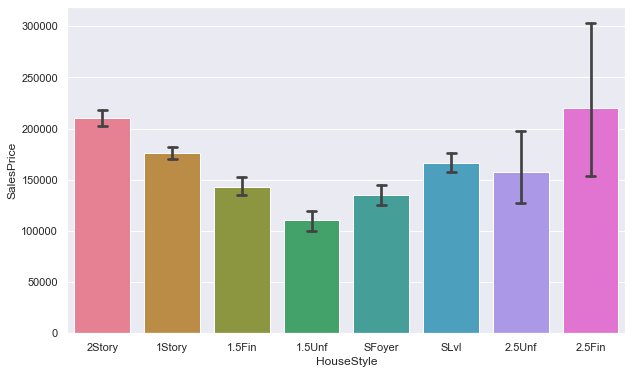

In [25]:
plt.figure(figsize=[10,6])
sns.barplot(data=house_style, x='HouseStyle', y='SalesPrice', palette='husl', capsize=0.13)
plt.show()

By looking at the graph. we can see that Two and one-half story: 2nd level finished house have highest sales price. followed by 2 story.<br>
One more thing we can notice that I-Bar of Two and one-half story: 2nd level finished house have high spread.<br>
sales prices between lowest and highest values.

## 9) What is effect of Zoning on Prices with respect to year sold.

In [26]:
RL = pd.DataFrame(train_data.loc[train_data['MSZoning'] == 'RL'][['PriceSales', 'YrSold']].values, 
                  columns=['SalesPrices', 'YrSold'])
RL['Zoning'] = 'RL'

RM = pd.DataFrame(train_data.loc[train_data['MSZoning'] == 'RM'][['PriceSales', 'YrSold']].values, 
                  columns=['SalesPrices', 'YrSold'])
RM['Zoning'] = 'RM'

C_all = pd.DataFrame(train_data.loc[train_data['MSZoning'] == 'C (all)'][['PriceSales', 'YrSold']].values, 
                  columns=['SalesPrices', 'YrSold'])
C_all['Zoning'] = 'C (all)'

FV = pd.DataFrame(train_data.loc[train_data['MSZoning'] == 'FV'][['PriceSales', 'YrSold']].values, 
                  columns=['SalesPrices', 'YrSold'])
FV['Zoning'] = 'FV'

RH = pd.DataFrame(train_data.loc[train_data['MSZoning'] == 'RH'][['PriceSales', 'YrSold']].values, 
                  columns=['SalesPrices', 'YrSold'])
RH['Zoning'] = 'RH'

In [27]:
zoning = pd.concat([RL, RM, C_all, FV, RH], ignore_index=True)
zoning

,SalesPrices,YrSold,Zoning
0,208500,2008,RL
1,181500,2007,RL
2,223500,2008,RL
3,140000,2006,RL
4,250000,2008,RL
...,...,...,...
1455,160000,2006,RH
1456,107000,2006,RH
1457,130000,2008,RH
1458,181000,2008,RH


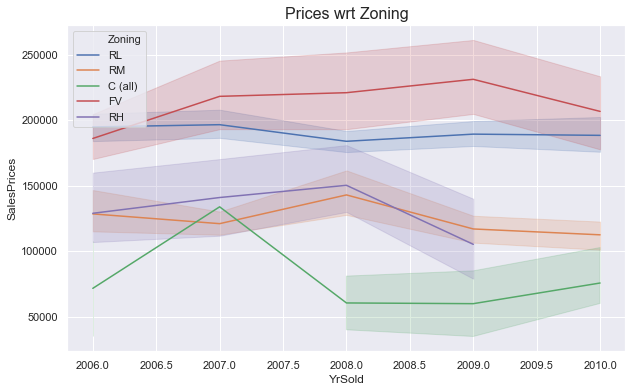

In [28]:
plt.figure(figsize=[10,6])
sns.lineplot(data=zoning, x='YrSold', y='SalesPrices', hue='Zoning')
plt.title('Prices wrt Zoning', fontsize=16)
plt.legend(loc='upper left')
plt.show()

FV have highest sales of entire category. In 2006 it had lower than RL.<br>
C (all) have high prices in 2007 then decrease.

## 10) How sales divided in differents types of dwelling.

In [29]:
dwelling = pd.DataFrame(train_data.groupby('MSSubClass')['MSSubClass'].count())
dwelling.columns =['Number of dwellings']
dwelling['MSSubClass'] = dwelling.index
dwelling

,Number of dwellings,MSSubClass
MSSubClass,,
20,536,20
30,69,30
40,4,40
45,12,45
50,144,50
60,299,60
70,60,70
75,16,75
80,58,80


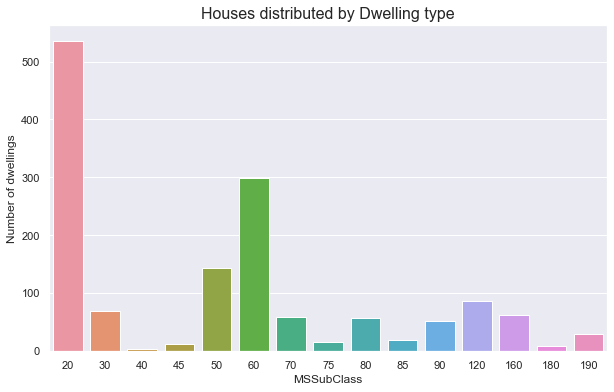

In [30]:
plt.figure(figsize=[10,6])
sns.barplot(data=dwelling, x='MSSubClass', y='Number of dwellings')
plt.title('Houses distributed by Dwelling type', fontsize=16)
plt.show()

<h4>20: 1-STORY 1946 & NEWER ALL STYLES</h4><br>
Have highest number of houses.<br>
<h4>60: 2-STORY 1946 & NEWER</h4><br>
2nd highest house. <br>
<br>
then followed by others.

## 11) Which location have highest sales within Ames city.

In [31]:
neighbour = pd.DataFrame(train_data.groupby('Neighborhood')['Neighborhood'].count())
neighbour.columns = ['Number of House']
neighbour['Neighborhood'] = neighbour.index
neighbour

,Number of House,Neighborhood
Neighborhood,,
Blmngtn,17,Blmngtn
Blueste,2,Blueste
BrDale,16,BrDale
BrkSide,58,BrkSide
ClearCr,28,ClearCr
CollgCr,150,CollgCr
Crawfor,51,Crawfor
Edwards,100,Edwards
Gilbert,79,Gilbert


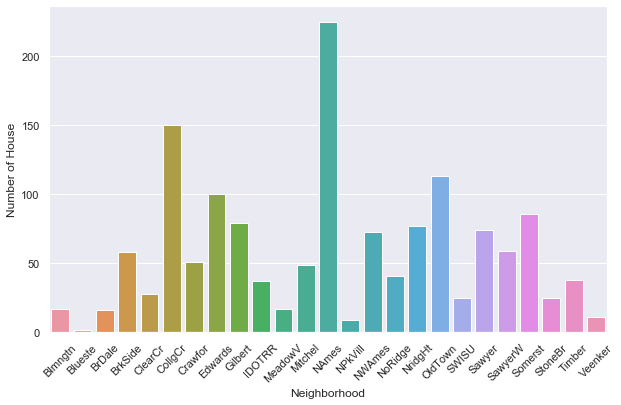

In [32]:
plt.figure(figsize=[10,6])
sns.barplot(data=neighbour, x='Neighborhood', y='Number of House')
plt.xticks(rotation=45)
plt.show()

NAmes : North Ames have highest house followed by CollgCr OldTown and others.

## 12) What is the quality percentage of houses.

In [33]:
quality_percentage = pd.DataFrame(train_data.groupby('OverallQual')['OverallQual'].count())
quality_percentage.columns = ['Number of Houses']
quality_percentage['Quality'] = quality_percentage.index
quality_percentage['Percentage'] = round((quality_percentage['Number of Houses']/sum(quality_percentage['Number of Houses']))*100,2)
quality_percentage

,Number of Houses,Quality,Percentage
OverallQual,,,
1,2,1,0.14
2,3,2,0.21
3,20,3,1.37
4,116,4,7.95
5,397,5,27.19
6,374,6,25.62
7,319,7,21.85
8,168,8,11.51
9,43,9,2.95


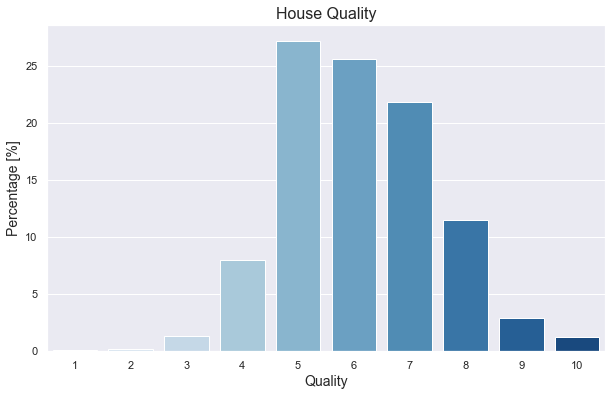

In [34]:
plt.figure(figsize=[10,6])
sns.barplot(data=quality_percentage, x='Quality', y='Percentage', palette='Blues')
plt.title('House Quality', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Percentage [%]', fontsize=14)
plt.show()

27% percent house belong to average quality and 26% house to above average.<br>
One thing we can notice that as quality increasing number of houses decreasing after average quality level. <br>
Very poor and poor quality are almost zero.

## 13) Are the sales increasing over year or not.

In [35]:
yearly_sales = pd.DataFrame(train_data.groupby('YrSold')['PriceSales'].count())
yearly_sales.columns = ['Sales']
yearly_sales['Years'] = yearly_sales.index
yearly_sales['Percentage'] = round((yearly_sales['Sales']/sum(yearly_sales['Sales']))*100,2)
yearly_sales

,Sales,Years,Percentage
YrSold,,,
2006,314,2006,21.51
2007,329,2007,22.53
2008,304,2008,20.82
2009,338,2009,23.15
2010,175,2010,11.99


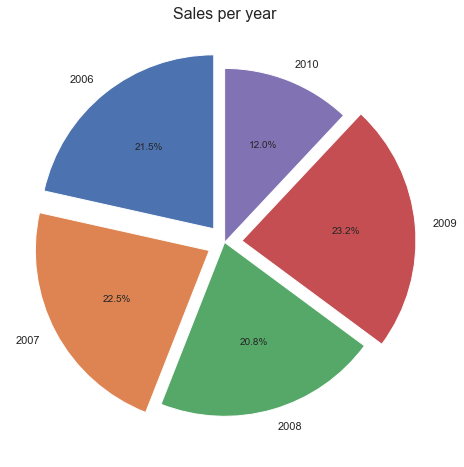

In [36]:
plt.figure(figsize=[8,8])
plt.pie(yearly_sales['Sales'], labels=yearly_sales['Years'], 
        autopct='%1.1f%%', explode=[0.1, 0.1, 0, 0.1, 0], startangle=90)
plt.title('Sales per year', fontsize=16)
plt.show()

2009 have highest sales followed by 2007, 2006, 2008 and 2010.<br>
Strange thing is 2010 have lowest sales.

## 14) Yearly Sold houses condition.

In [37]:
yearly_cond = pd.DataFrame(train_data.groupby(['YrSold', 'OverallCond'])['PriceSales'].count())
yearly_cond.columns = ['Number of Houses']
yearly_cond.reset_index(inplace=True)
yearly_cond.head()

,YrSold,OverallCond,Number of Houses
0,2006,2,1
1,2006,3,5
2,2006,4,20
3,2006,5,192
4,2006,6,44


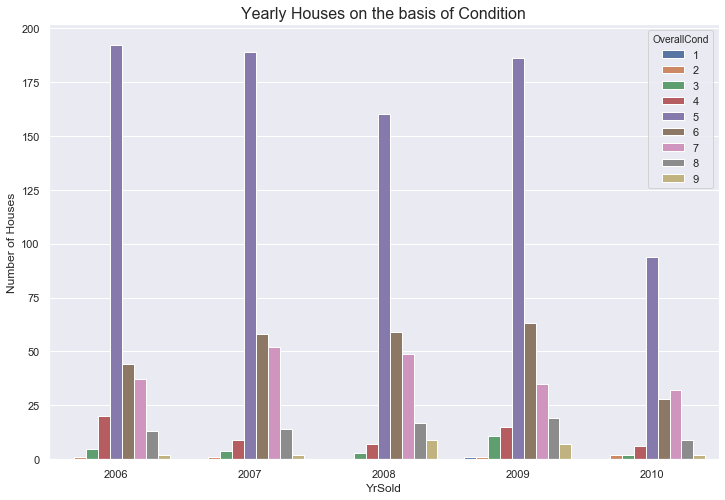

In [38]:
plt.figure(figsize=[12, 8])
sns.barplot(data=yearly_cond, x='YrSold', y='Number of Houses', hue='OverallCond')
plt.title('Yearly Houses on the basis of Condition', fontsize=16)
plt.show()

2006 to 2009 is showing same pattern of house condition per year. but 2010 have different pattern.<br>
Averge condition houses have high sales each year. <br>
Good condition houses have high sales than above average in 2010 but other years above condition have high sales.

## 15) House prices wrt garage condition.

In [39]:
TA = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'TA']['PriceSales'].values, 
                  columns=['Prices'])
TA['condition'] = 'TA'

Fa = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'Fa']['PriceSales'].values, 
                  columns=['Prices'])
Fa['condition'] = 'Fa'

none = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'None']['PriceSales'].values, 
                  columns=['Prices'])
none['condition'] = 'None'

Gd = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'Gd']['PriceSales'].values, 
                  columns=['Prices'])
Gd['condition'] = 'Gd'

Po = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'Po']['PriceSales'].values, 
                  columns=['Prices'])
Po['condition'] = 'Po'

Ex = pd.DataFrame(train_data.loc[train_data['GarageCond'] == 'Ex']['PriceSales'].values, 
                  columns=['Prices'])
Ex['condition'] = 'Ex'

cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']
garag_cond = pd.concat([TA, Fa, none, Gd, Po, Ex], ignore_index=True)
garag_cond['condition'] = pd.Categorical(garag_cond['condition'], categories=cond, ordered=True)
garag_cond.head()

,Prices,condition
0,208500,TA
1,181500,TA
2,223500,TA
3,140000,TA
4,250000,TA


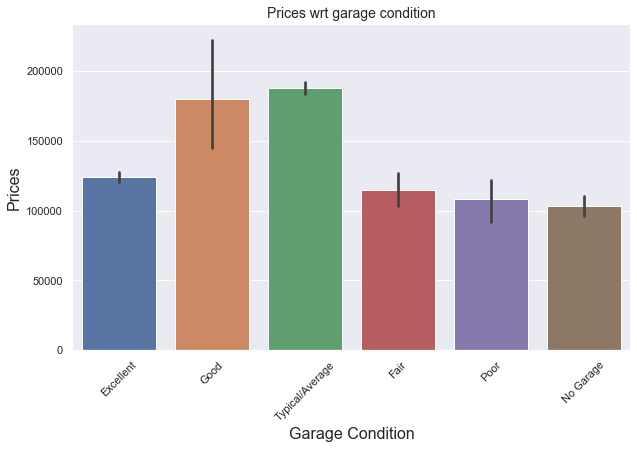

In [40]:
plt.figure(figsize=[10,6])
sns.barplot(data=garag_cond, x='condition', y='Prices')
labels = ['Excellent', 'Good', 'Typical/Average', 'Fair', 'Poor', 'No Garage']
plt.xticks([0,1,2,3,4,5], labels=labels, rotation=45)
plt.title('Prices wrt garage condition', fontsize=14)
plt.xlabel('Garage Condition', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.show()

Average and Good garage condition have high prices.<br>
We can say that house having garage with excellent condition doesn't mean it will have high price.